# 데이터 출처 : https://www.kaggle.com/datasets/zhangluyuan/ab-testing

In [3]:
! kaggle datasets download -d zhangluyuan/ab-testing

Dataset URL: https://www.kaggle.com/datasets/zhangluyuan/ab-testing
License(s): unknown
 74%|████████████████████████████▏         | 3.00M/4.04M [00:00<00:00, 5.94MB/s]
100%|██████████████████████████████████████| 4.04M/4.04M [00:00<00:00, 6.21MB/s]


In [8]:
! unzip ab-testing.zip -d ./data

Archive:  ab-testing.zip
  inflating: ./data/ab_data.csv      


# 1. 데이터 탐색 
user_id : 사용자 ID

timestamp : 타임 스탬프(시간 표기)

group : 사용자가 control 혹은 treatment 그룹에 속하는 지 여부

landing_page : 사용자가 최초로 보게 되는 페이지가 new_page 혹은 old_page인지 여부

converted : 사용자가 0(전환하지 않음) 혹은 1(전환)인지 여부

## 1. 데이터의 종류와 속성
-  주어진 데이터셋에서 범주형 및 연속형 데이터 열을 식별하고, 각 열의 기술 통계와 빈도수를 출력해보세요

In [222]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt

#데이터 셋 로드 
csv_path = './data/ab_data.csv'
df =  pd.read_csv(csv_path)

# 데이터 처음 몇 줄 인쇄 
print("#"*5,"데이터 처음 몇 줄 인쇄")
print(df.head(10))

# 기본 통계 확인
print("#"*5,"기본 통계 확인 ")
print(df.describe())

# 컬럼 정보 확인 
print("#"*5,"컬럼 정보 확인", '#'*5)
print(df.info())
print("#"*10)

##### 데이터 처음 몇 줄 인쇄
   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
5   936923  2017-01-10 15:20:49.083499    control     old_page          0
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1
7   719014  2017-01-17 01:48:29.539573    control     old_page          0
8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1
##### 기본 통계 확인 
             user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min   

In [224]:
# 범주형 및 연속형 데이터 열을 식별
print("#"*10)
print("데이터 타입 확인")
print("data types:\n", df.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = df.select_dtypes(include = ['object', 'category']).columns
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols.values)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols.values)

##########
데이터 타입 확인
data types:
 user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 ['timestamp' 'group' 'landing_page']
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 ['user_id' 'converted']


In [226]:
# 각 열의 기술 통계와 빈도 수를 출력

#빈도수 출력할 columns: group, landing page, converted 
freq_cols = ["group", "landing_page	", "converted" ]
print("#####", "data.groupby('group')")
print(df.groupby('group').count().reset_index())

print("#####", "data.groupby('landing_page')")
print(df.groupby('landing_page').count().reset_index())

print("#####", "data.groupby('converted')")
print(df.groupby('converted').count().reset_index())




##### data.groupby('group')
       group  user_id  timestamp  landing_page  converted
0    control   147202     147202        147202     147202
1  treatment   147276     147276        147276     147276
##### data.groupby('landing_page')
  landing_page  user_id  timestamp   group  converted
0     new_page   147239     147239  147239     147239
1     old_page   147239     147239  147239     147239
##### data.groupby('converted')
   converted  user_id  timestamp   group  landing_page
0          0   259241     259241  259241        259241
1          1    35237      35237   35237         35237


-> group, landing_page는 각 라벨 비율이 비슷하지만, converted는 아니다. 

In [228]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


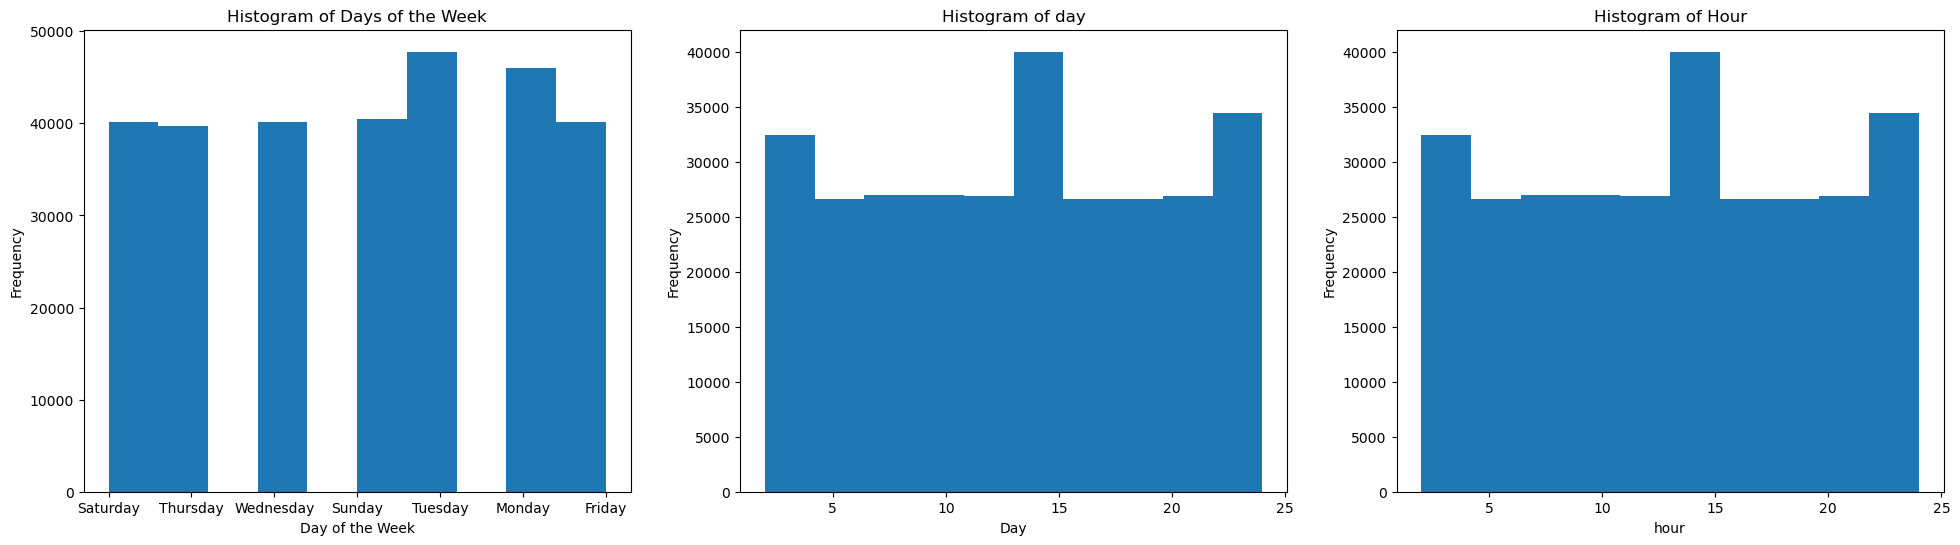

In [166]:
# timestamp 시각화 

# 시간대 전처리: str을 datetime 형태로 
df['timestamp'] = pd.to_datetime(df['timestamp'] )

# 요일, 일자, 시간대를 각각 추출하여 새로운 열 생성
df['day_of_week'] = df['timestamp'].dt.day_name()  # 요일
df['day'] = df['timestamp'].dt.day  # 일자
df['hour'] = df['timestamp'].dt.hour  # 시간대

# 요일별 시각화 
f, axes = plt.subplots(1,3, figsize = (24,6))

axes[0].hist(df['day_of_week'])
axes[0].set_title('Histogram of Days of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['day'])
axes[1].set_title('Histogram of day')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['day'])
axes[2].set_title('Histogram of Hour')
axes[2].set_xlabel('hour')
axes[2].set_ylabel('Frequency')


plt.show()

> 각 day, 요일, 시간 별로 고르게 분포되어 있다. 

### ANSWER
- 범주형 데이터: group, timestamp, landing page
- 연속형 데이터: user_id, converted

## 2. 데이터 탐색 (EDA)
- 제공된 데이터셋의 결측치와 중복을 파악하고, 적절한 처리 방안을 제안해보세요.

In [46]:
print("결측치 있는 row 개수", df.isnull().sum())

결측치 있는 row 개수 user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


### ANSWER
- 결측치 없음

In [ ]:
3. 기초통계
● 데이터셋의 왜도와 첨도를 계산하고, 그 의미에 대해 설명해보세요.
- 해당 데이터에서 

In [175]:
"""
왜도(Skewness): 0에 가까울수록 정규분포에 근사, 양의 값은 오른쪽 꼬리가 긴 분포(왼쪽으로 치우친), 음의 값은 왼쪽 꼬리가 긴 분포(오른쪽으로 치우친)
첨도(Kurtosis): 0에 가까울수록 정규분포에 근사, 높으면 분포가 뾰족하고, 낮으면 평평
"""

print("\nSkewness of the data:\n", df['converted'].skew())
print("\nKurtosis of the data:\n", df['converted'].kurt())



Skewness of the data:
 2.3437251398234857

Kurtosis of the data:
 3.493071254812598


continuous numeric한 variable이 없어서 skewness와 kurtosis를 측정하는 것이 무의미함. 
그래도 일단 숫자형 데이터인 converted로 측정해보았다.. 
둘다 정규 분포에 근사하지는 않다는 결론이 나옴
- 왜도: 양의 값이 나왔기 때문에, 왼쪽으로 치우친 분포이다.
- 첨도: 양의 값이 나왔기 때문에, 위로 뾰족한 분포를 띈다. 

# 4. 상관관계와 인과관계
- 선택한 두 변수 간의 상관관계를 계산하고, 그 결과를 해석해보세요. 이를 바탕으로 가능한 인과관계를 논의해보세요. 
- landing page 종류가 사용자들 웹사이트에 영향을 주는지 상관 관계 계산 

In [186]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
       'day_of_week', 'day', 'hour'],
      dtype='object')

In [196]:
cols = ['user_id', 'converted']
print("Pearson Correlation:\n", df[cols].corr(method='pearson'))

Pearson Correlation:
             user_id  converted
user_id    1.000000   0.001699
converted  0.001699   1.000000
Pearson Correlation:
             user_id  converted
user_id    1.000000   0.001698
converted  0.001698   1.000000


> 결론: user id와 웹 사이트 페이지 전환은 거의 상관 관계가 없다.
> (numeric 한 데이터가 없어서 그냥 user_id를 넣었다...ㅡㅜ)

# 5. 가설검정과 A/B 테스트
- 주어진 데이터를 사용하여 A/B 테스트를 설계하고, 가설을 설정한 후 통계적 검정을 수행하세요. 결과를 해석하고 결론을 도출해보세요.
- 본인의 수집한 데이터에서 가설검정, A/B 테스트를 수행해보기 어렵다면 어떤 가설을 설정하고 A/B 테스트를 어떻게 설계했을지 생각해보세요

- 가설 설정(H1): 진입 페이지 종류(landing_page)에 의해서 converted 결과가 달라질 것이다.
- 참고 : https://www.kaggle.com/code/chenwei17557/a-b-test-on-landing-page-power-analysis-z-test

In [217]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import scipy.stats as stats

# 예제 데이터 프레임 생성

# 교차표 작성 -  categorical 데이터를 비율로 변경 
contingency_table = pd.crosstab(df['landing_page'], df['converted'])

# 카이제곱 검정 수행: 두 범주형 변수 간에 독립성 
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# 결과 해석
if p < 0.05:
    print("초입 페이지 유형과 페이지 접속여부 간에 통계적으로 유의한 관계가 있습니다.")
else:
    print("초입 페이지 유형과 페이지 접속여부 간에 통계적으로 유의한 관계가 없습니다.")

Chi-square statistic: 1.85683247803069
p-value: 0.1729908232665563
Degrees of freedom: 1
Expected frequencies:
[[129620.5  17618.5]
 [129620.5  17618.5]]
초입 페이지 유형과 페이지 접속여부 간에 통계적으로 유의한 관계가 없습니다.
